In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/KidQuant/datasets/main/loans.csv')
data.head()

C:\Users\drebi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128             360.0   
1             3000                0.0          66             360.0   
2             2583             2358.0         120             360.0   
3             6000                0.0         141             360.0   
4             2333             1516.0          95             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [2]:
data.shape

(381, 13)

In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         381.000000  381.000000        370.000000   
mean       3579.845144        1277.275381  104.986877        340.864865   
std        1419.813818        2340.818114   28.358464         68.549257   
min         150.000000           0.000000    9.000000         12.000000   
25%        2600.000000           0.000000   90.000000        360.000000   
50%        3333.000000         983.000000  110.000000        360.000000   
75%        4288.000000        2016.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      351.000000  
mean         0.837607  
std          0.369338  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.isnull().sum() 

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
categorical_columns=[col for col in data.columns if data[col].dtype=='O']
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [8]:
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\1000206799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [9]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\3294029491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)


In [10]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\3682394416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


In [11]:
data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Drop Unnecessary Columns
data.drop('Loan_ID', axis=1, inplace=True)

In [13]:
# Handling datatypes 
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [14]:
data['Dependents'] = data['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])

C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\1785700473.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Dependents'] = data['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])


In [15]:
data.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
data['Credit_History'] = data['Credit_History'].astype(int)

In [17]:
data.head()

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male     Yes           1      Graduate            No             4583   
1   Male     Yes           0      Graduate           Yes             3000   
2   Male     Yes           0  Not Graduate            No             2583   
3   Male      No           0      Graduate            No             6000   
4   Male     Yes           0  Not Graduate            No             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1508.0         128             360.0               1   
1                0.0          66             360.0               1   
2             2358.0         120             360.0               1   
3                0.0         141             360.0               1   
4             1516.0          95             360.0               1   

  Property_Area Loan_Status  
0         Rural           N  
1         Urban           Y  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [18]:
label_encoder_columns = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in label_encoder_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [19]:
data.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          0              0             4583   
1       1        1           0          0              1             3000   
2       1        1           0          1              0             2583   
3       1        0           0          0              0             6000   
4       1        1           0          1              0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1508.0         128             360.0               1   
1                0.0          66             360.0               1   
2             2358.0         120             360.0               1   
3                0.0         141             360.0               1   
4             1516.0          95             360.0               1   

   Property_Area  Loan_Status  
0              0            0  
1              2            1  
2              2            1  
3              2            1  
4              2            1

<Axes: >

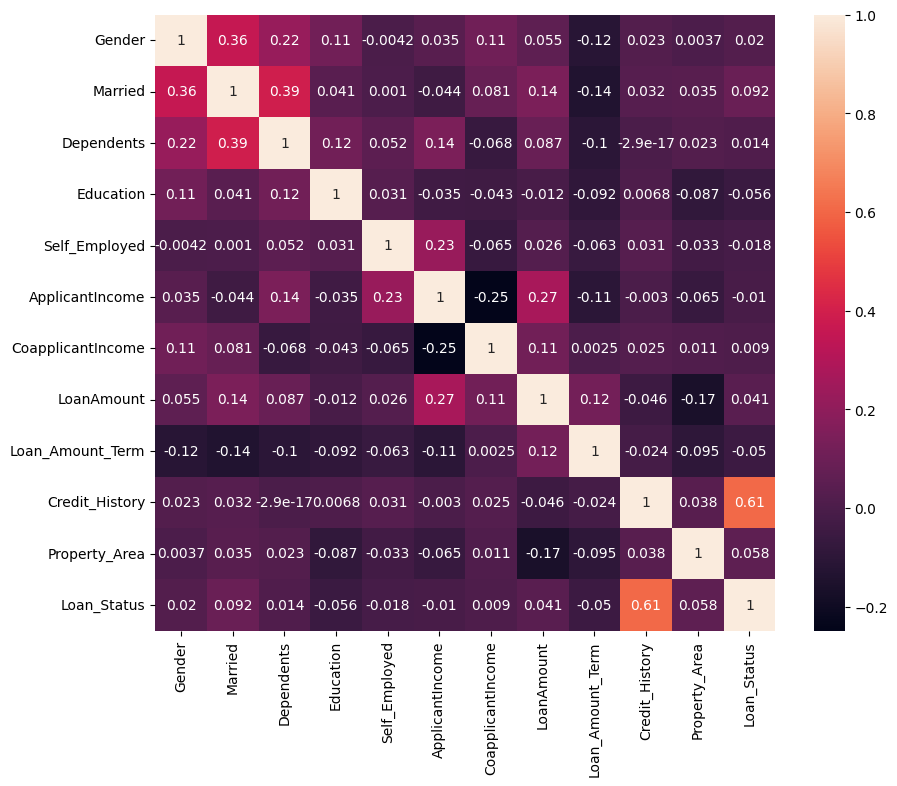

In [20]:
plt.figure(figsize=(10,8))
corr_df = data.corr()
sns.heatmap(corr_df, annot=True)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

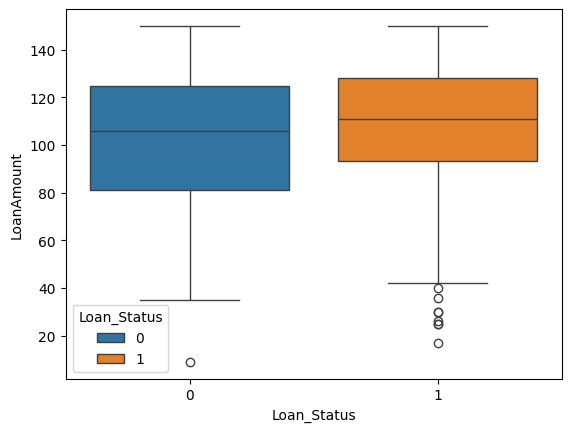

In [21]:
sns.boxplot(data=data, x='Loan_Status', y='LoanAmount', hue='Loan_Status')

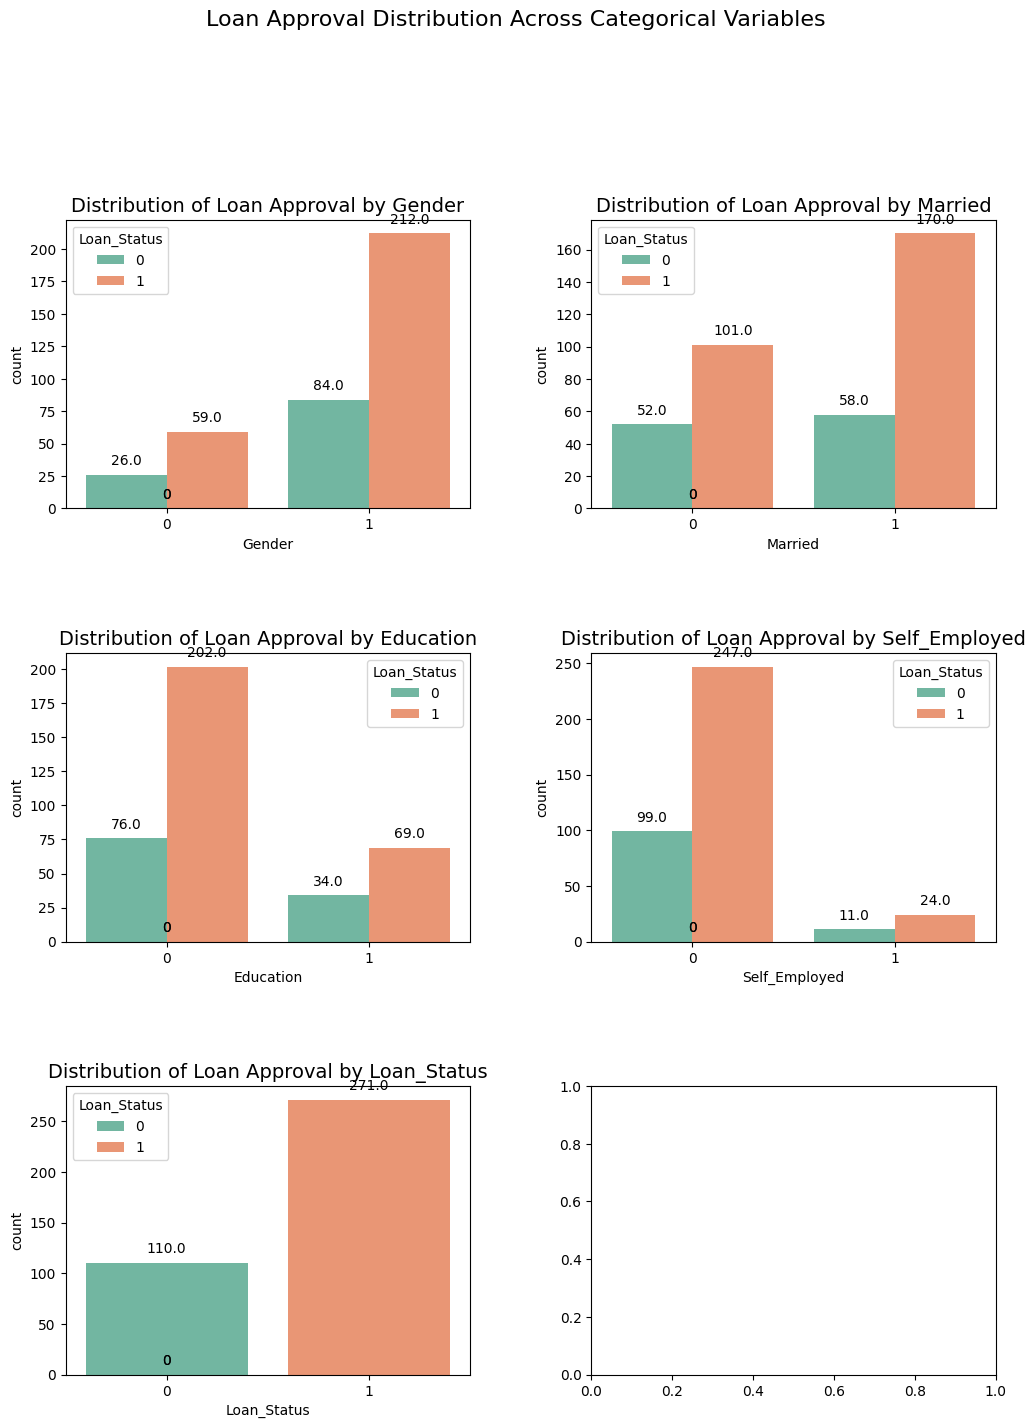

In [22]:
categorical_columns = ['Gender', 'Married', 'Education','Self_Employed', 'Loan_Status']

fig, ax = plt.subplots(3, 2, figsize=(12, 15))

# Loop through categorical columns for visualization
for index, cat_col in enumerate(categorical_columns):
    row, col = index // 2, index % 2
    sns.countplot(x=cat_col, data=data, hue='Loan_Status', ax=ax[row, col], palette='Set2')
    
    # Add title
    ax[row, col].set_title(f'Distribution of Loan Approval by {cat_col}', fontsize=14)

    # Add annotations for better readability
    for p in ax[row, col].patches:
        ax[row, col].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Add overall title
plt.suptitle('Loan Approval Distribution Across Categorical Variables', fontsize=16, y=1.02)

# Show the plot
plt.show()

C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\2605319233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\2605319233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
C:\Users\drebi\AppData\Local\Temp\ipykernel_64680\2605319233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
C

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       381.000000         381.000000  381.000000        381.000000
mean       3579.845144        1277.275381  104.986877        341.417323
std        1419.813818        2340.818114   28.358464         67.625957
min         150.000000           0.000000    9.000000         12.000000
25%        2600.000000           0.000000   90.000000        360.000000
50%        3333.000000         983.000000  110.000000        360.000000
75%        4288.000000        2016.000000  127.000000        360.000000
max        9703.000000       33837.000000  150.000000        480.000000


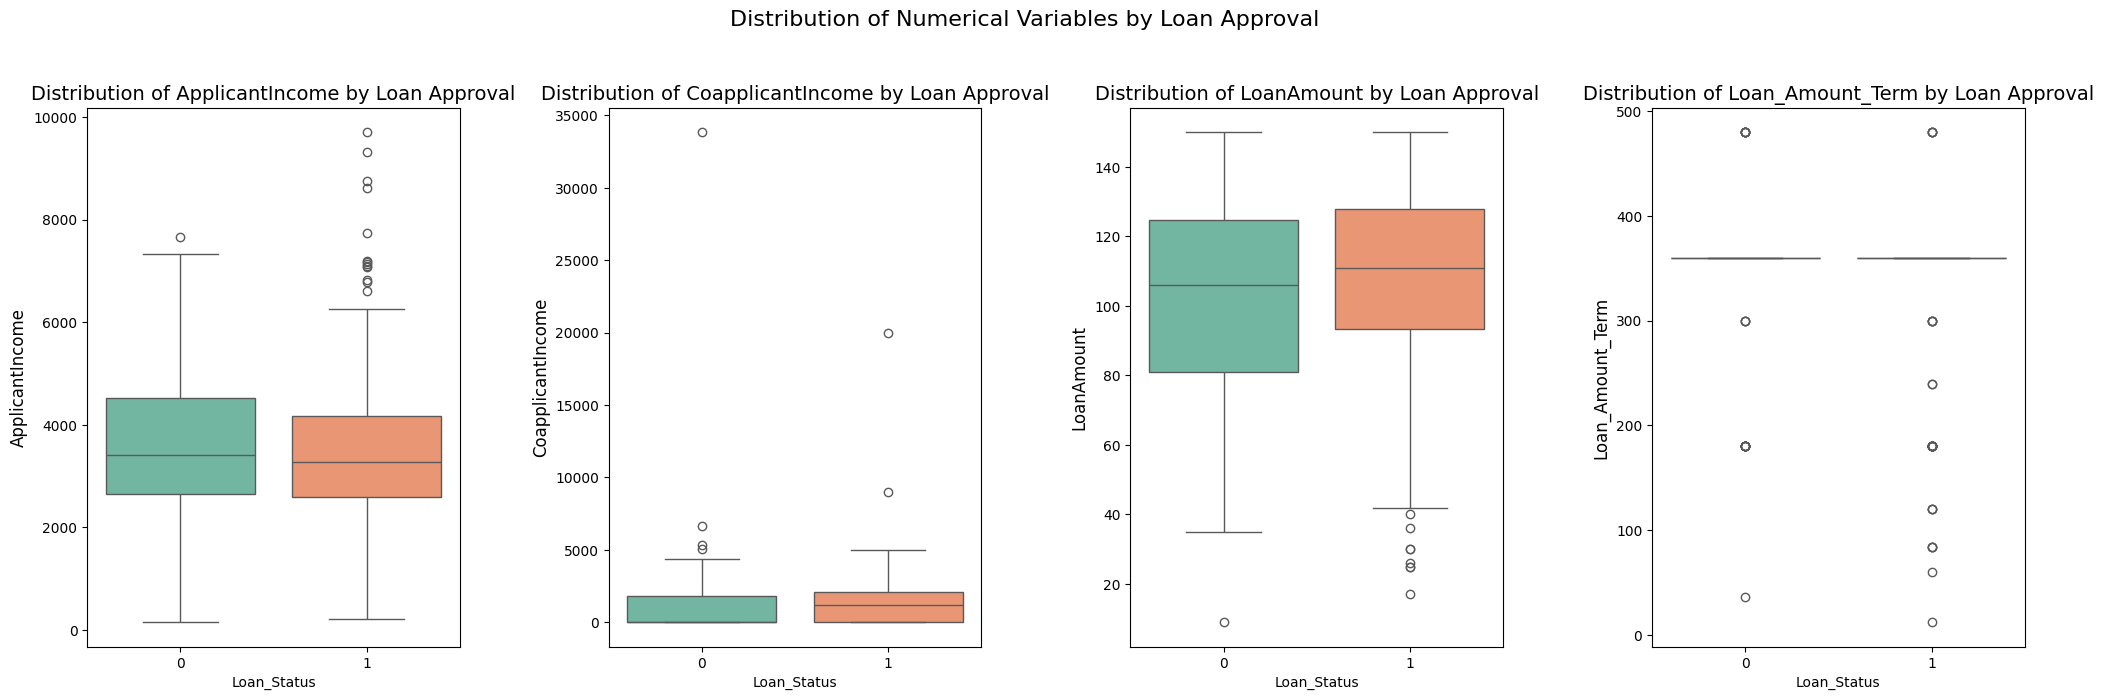

In [23]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axes = plt.subplots(1, 4, figsize=(25, 7))

# Loop through numerical columns for visualization
for idx, num_col in enumerate(numerical_columns):
    sns.boxplot(x='Loan_Status', y=num_col, data=data, ax=axes[idx], palette='Set2')
    
    # Add title
    axes[idx].set_title(f'Distribution of {num_col} by Loan Approval', fontsize=14)
    
    # Add y-axis label
    axes[idx].set_ylabel(num_col, fontsize=12)

# Add overall title
plt.suptitle('Distribution of Numerical Variables by Loan Approval', fontsize=16, y=1.02)

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.4)

# Display summary statistics
print(data[numerical_columns].describe())

# Show the plot
plt.show()

In [24]:
ind_col = [col for col in data.columns if col != 'Loan_Status']
dep_col = 'Loan_Status'

In [25]:
X = data[ind_col]
y = data[dep_col]

X.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          0              0             4583   
1       1        1           0          0              1             3000   
2       1        1           0          1              0             2583   
3       1        0           0          0              0             6000   
4       1        1           0          1              0             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1508.0         128             360.0               1   
1                0.0          66             360.0               1   
2             2358.0         120             360.0               1   
3                0.0         141             360.0               1   
4             1516.0          95             360.0               1   

   Property_Area  
0              0  
1              2  
2              2  
3              2  
4              2

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [27]:
print(X_train.shape)
print(X_test.shape)

(304, 11)
(77, 11)


In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
rf_classifier = RandomForestClassifier(n_estimators = 50, 
                                       min_samples_split = 10, 
                                       min_samples_leaf = 4, 
                                       max_features = 'sqrt', 
                                       max_depth = 30, bootstrap = True)

In [29]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50)

In [30]:
rf_pred = rf_classifier.predict(X_test)

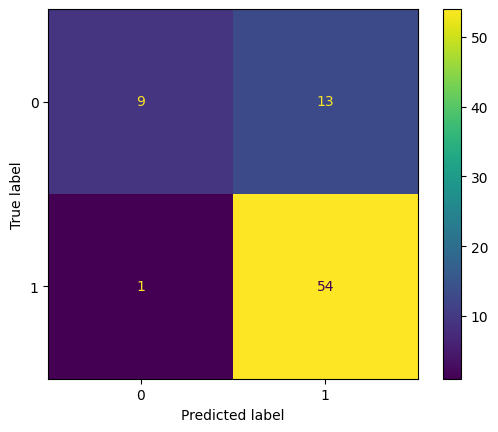

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_rf = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_rf,
                              display_labels=rf_classifier.classes_)
disp.plot()

plt.show()

In [32]:
from sklearn.metrics import accuracy_score

# Accuracy of Random Forest
RF_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest:")
print(RF_accuracy)

Accuracy of Random Forest:
0.8181818181818182


In [33]:
from sklearn.metrics import auc, roc_curve

y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Text(0.5, 1.0, 'Random Forest\nAccuracy: 81.82%')

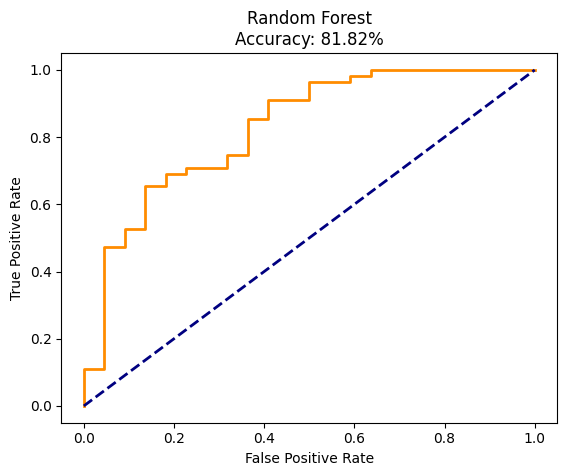

In [34]:
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest\nAccuracy: {:.2f}%'.format(RF_accuracy * 100))